In [ ]:
import numpy as np
from scipy import stats
import pandas as pd
from sklearn.model_selection import train_test_split as sample
from sklearn.manifold import MDS
# делаем импорт всех необходимых библиотек
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid", palette="muted")
# Отключение некоторых лишних предупреждений
import warnings
warnings.filterwarnings("ignore")

## Часть 1: Предварительныя обработка данных и визуализация

_Над этой частью работала Махтина Софья_

### Датасет про болезни сердца (heart disease)

__Описание переменных:__
- __HighBP:__ Врач, медсестра или другой медицинский работник сказали, что у респондентов высокое кровяное давление;
- __HighChol:__  Врач, медсестра или другой медицинский работник сказал, что у респондентов высокий уровень холестерина в крови;
- __CholCheck:__ Была проверка уровня холестерина в течение последних пяти лет;
- __BMI:__ Индекс массы тела;
- __Smoker:__ Респондент выкурил по крайней мере 100 сигарет за всю свою жизнь(около 5 пачек);
- __Stroke:__ У респондента был инфаркт;
- __Diabetes:__ У респондента есть диабет, где 0 - отсутствие диабета или только гестационный(возникает во время беременности), 1 - диабет 1 типа, 2 - 2 типа; 
- __PhysActivity:__ В течение последних 30 дней респондент регулярно был физически активным;
- __Fruits:__ В ежедневном рационе респондента присутствуют фрукты;
- __Veggies:__  В ежедневном рационе респондента присутствуют овощи;
- __HvyAlcoholConsump:__ Респонденты-мужчины, выпивают более 14 напитков в неделю, и респонденты-женщины, выпивающие более 7 напитков в неделю;
- __AnyHealthcare:__ У респондента есть какой-либо вид медицинского страхования, включая медицинскую страховку;
- __NoDocbcCost:__ Респонденту за последние 12 месяцев нужно было обратиться к врачу, но он не мог этого сделать из-за дороговизны;
- __GenHlth:__ Состояние здоровья респондента в целом, где 1 - отличное, а 5 - плохое;
- __MentHlth:__ Количество дней из последних 30, когда ментальное состояние респондента было нормальным;
- __PhysHlth:__ Количество дней из последних 30, когда физическое самочувствие респондента было нормальным;
- __DiffWalk:__ Респондент испытывает затруднения при ходьбе или подъеме по лестнице;
- __Sex:__ Пол респондента, где 0 - женщина, 1 - мужчина;
- __Age:__ Возраст респондента (здесь данные поделены на 13 групп, где 1 - 18-24 года, 13 - 80 лет и старше);
- __Education:__  Сведения об образования респондента также сгруппированы, где 1 - никогда не посещал школу или детский сад, а 6 - учился в колледже 4 года или более;
- __Income:__ Доход респондента, где 1 - менее 10 000 долларов, а 8 - 75 000 долларов или больше;

### 1. Выгружаем данные и описываем:

In [ ]:
df_heart = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv') # скачиваем данные
df_heart.head()#выводим первые 5 строк

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


__Типы признаков:__
* __Бинарные переменные:__ 'HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex'
* __Количественные переменные:__ 'BMI', 'MentHlth', 'PhysHlth'
* __Порядковые переменные:__ 'Diabetes', 'GenHlth', 'Age', 'Education', 'Income' 

In [ ]:
# выводим статистическую сводку (с помощью метода describe) в транспонированном виде, для удобства анализа
display(df_heart.describe().T)
df_heart.info() # выводим информацию о данных в таблице

,count,mean,std,min,25%,50%,75%,max
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
Diabetes,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

### 2. Отбираем часть данных и проверяем на пропуски:

In [ ]:
# в датасете много наблдений, оставим 3000 из них с помощью sample, при этом сохраним равные доли 0 и 1 в HeartDiseaseorAttack 
_, data_heart = sample(df_heart, test_size=3000, stratify=df_heart['HeartDiseaseorAttack'], random_state=2023)
# shape вернет нам кортеж с размерностью датасета, это для того, чтоб убедится, что мы обрезали данные так как и хотели
data_heart.shape 

(3000, 22)

In [ ]:
# Проверим данные на пропуски
# функция isna ищет пропуски в данных, функция sum суммирует
print(f'Пропусков в данных: {data_heart.isna().sum().sum()}')

Пропусков в данных: 0


### 3. Проверим данные на наличие выбросов:

_Построим ящики с усами для визуализации выбросов по всем переменным, кроме HeartDiseaseorAttack, которая в дальнешем будет целевой. Пока мы смотрим только на 21 признак для удобства визуализации, дальше все равно будем применять многомерное шкалирование._

In [ ]:
cols = np.array(data_heart.columns)[1:]
cols

array(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'], dtype=object)

In [ ]:
def boxplots(data: pd.DataFrame, colnames: np.array): #напишем функцию, которая построит все графики сразу
    plt.figure(figsize = (20, 40))
    for ind in range(1, len(colnames)+1):
        ax = plt.subplot(7, 3, ind)
        plt.boxplot(data[colnames[ind-1]])
        plt.title(colnames[ind-1], fontsize=17)

Text(0.5, 0.9, 'Выбросы по разным признакам')

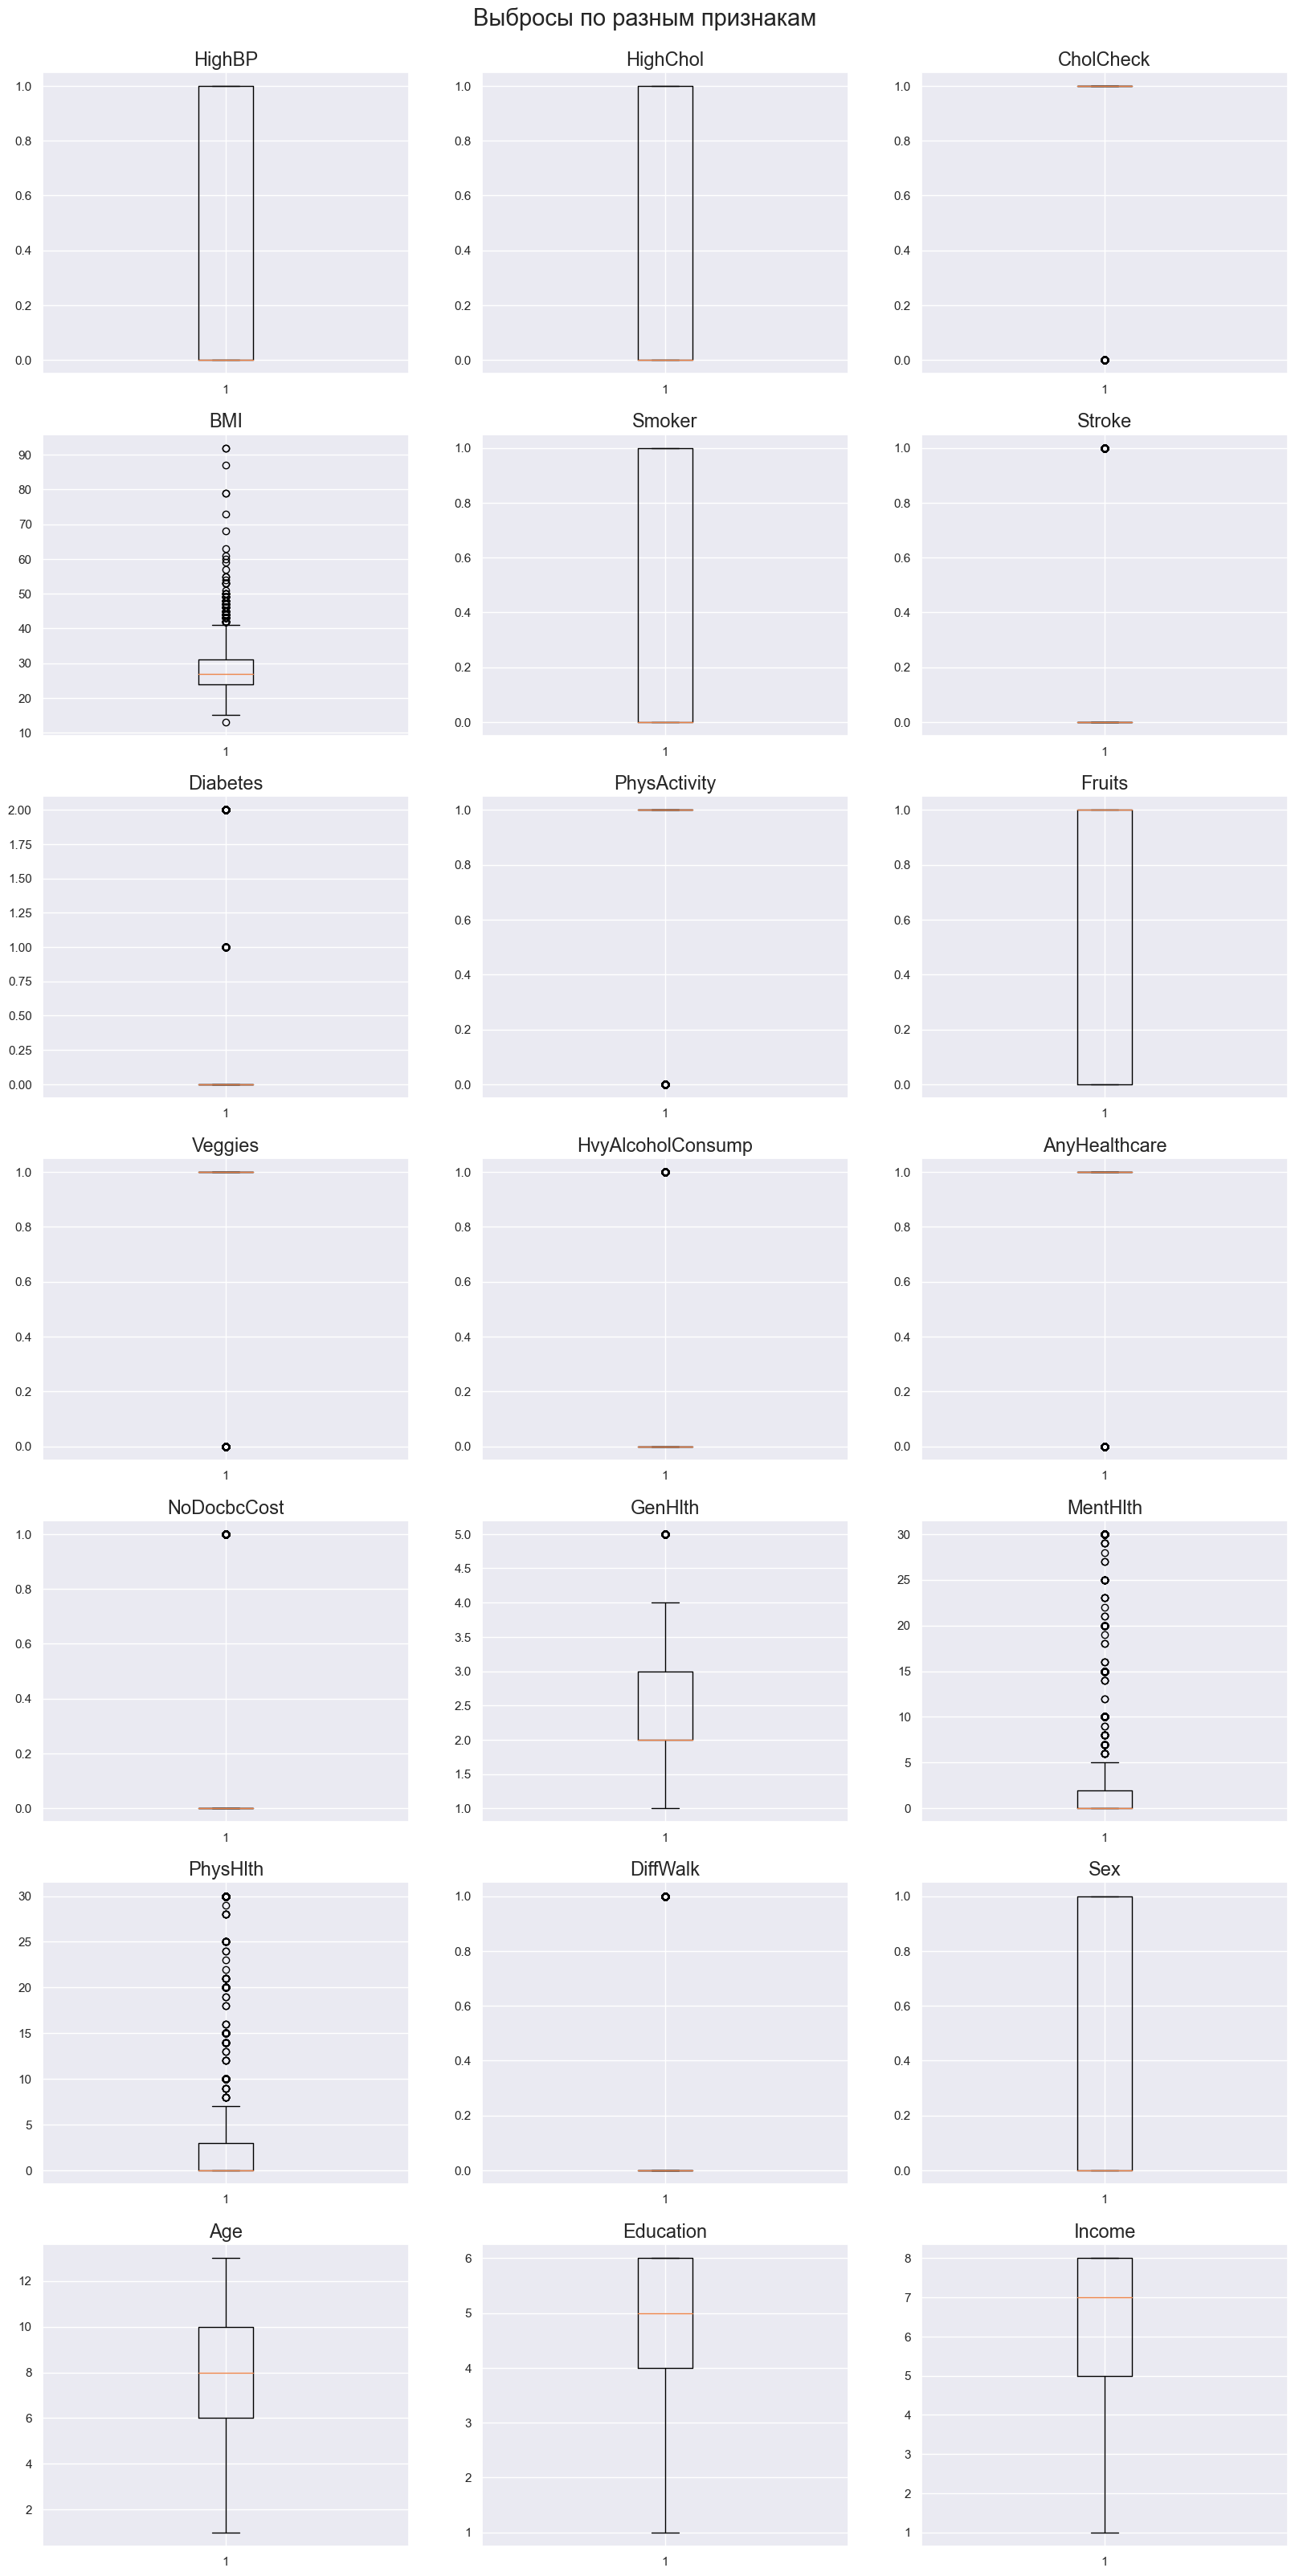

In [ ]:
boxplots(data_heart, cols)
plt.suptitle('Выбросы по разным признакам', fontsize=21, y=0.9)

_По графикам видно, что есть выбросы в различных переменных, а поскольку данные многомерны мы решили применить многомерное шкалирование, чтобы дальше избавиться от них. Мы выбрали именно MDS, так как в данных есть категориальные переменные, поэтому, например, не получилось взять для этих целей PCA (он еще и усложняет задачу)._

Произведем сжатие данных с помощью многомерного шкалирования, затем удалим данные, которые выходят за рамки 2х стандартных отклонений хотя бы по одной MDS компоненте.

__Примечание:__ _MDS()_ делает нам многомерное шкалирование, многомерное так так у нас более 2 параметров для сравнения, а с помощью _.fit_transform_ можно сразу и вычислить формулу для преобразования и выполнить его.

In [ ]:
data_heart_mds = MDS(random_state=2023).fit_transform(data_heart) 

In [ ]:
# этой функцией мы хотим найти и удалить выбросы из данных, если z-score превышает по модулю threshold
def remove_outliers(data, threshold=2): 
    z_scores = np.abs(stats.zscore(data)) # стандартая функция для рассчета z-score
    inliers = (z_scores < threshold).all(axis=1)
    filtered_data = data[inliers]
    return filtered_data, inliers
# используем именно диаграмму рассеяния так как есть сопряженные числовые данные
def plot_data(data, filtered_data): # строим две диаграммы рассеяния: для изначальных данных и преобразованных ранее
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    sns.scatterplot(x=data[:, 0], y=data[:, 1], label='Original Data', ax=ax[0])
    ax[0].set_title('Original Data')
    sns.scatterplot(
        x=filtered_data[:, 0],
        y=filtered_data[:, 1],
        label='Filtered Data',
        color='red',
        ax=ax[1]
    ) # стандартные операции для построения графиков
    ax[1].set_title('Filtered Data (Outliers Removed)')
    plt.show()

Ниже представлены диаграммы рассеяния с MDS проекциями (мы визуализируем данные, которые были преобразованы из пространства большой размерности). Каждая точка на диаграмме соответствует одному объекту в исходном датасете, относительные расстояния между точками на диаграмме дают представление об относительных нахождениях между объектами в исходном многомерном датасете. Для анализа влияния выбросов на наши данные мы построили 2 диаграммы: в “original data” есть выбросы, а в “filtered data” их нет. Мы видим, что особого статистически значимого влияния на данные выбросы не оказали, хотя и составляют примерно 1/10 всей нашей выборки.

In [ ]:
data_heart_inliers, inliers = remove_outliers(data_heart_mds)
data_heart = data_heart.loc[inliers] # получили данные без выбросов
data_heart.shape 

(2635, 22)

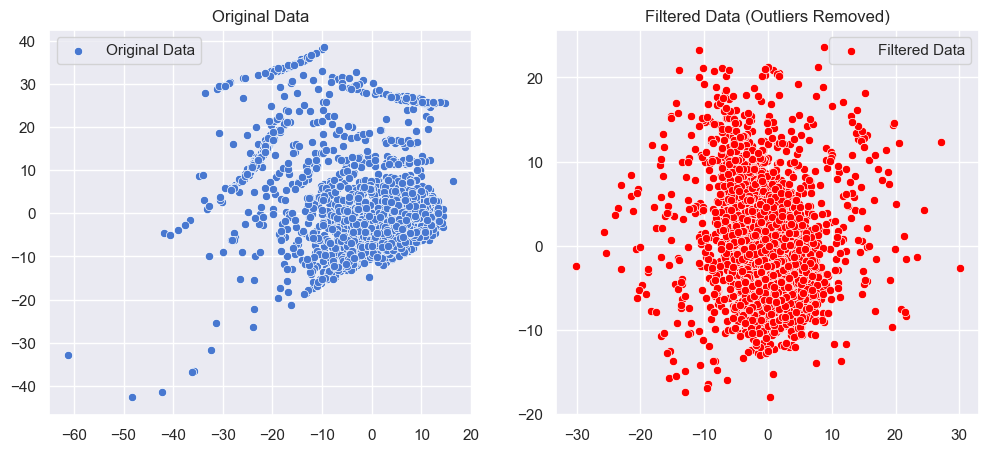

In [ ]:
# отшкалируем признаки уже без выбросов и отобразим на графиках, чтобы увидеть изменение
data_heart_filt = MDS(random_state=2023).fit_transform(data_heart) 
plot_data(data_heart_mds, data_heart_filt)

_Было изначально 3000 наблюдений, выбросы составили чуть больше 10% всех наблдений_

### 4. Посчитаем корреляцию и посмотрим на наличие связей между переменными:

In [ ]:
def corr_sig(df): # написали функцию для рассчета p-value
    p_matrix = np.zeros(shape=(df.shape[1], df.shape[1]))# создали матрицу из нулей, по факту ее размерность 1*1
    for col in df.columns:
        for col2 in df.drop(col, axis=1).columns:
            _ , p = stats.spearmanr(df[col],df[col2]) # Вычислили коэффициент корреляции Спирмена с соответствующим p-value
            p_matrix[df.columns.to_list().index(col), df.columns.to_list().index(col2)] = p
    return p_matrix

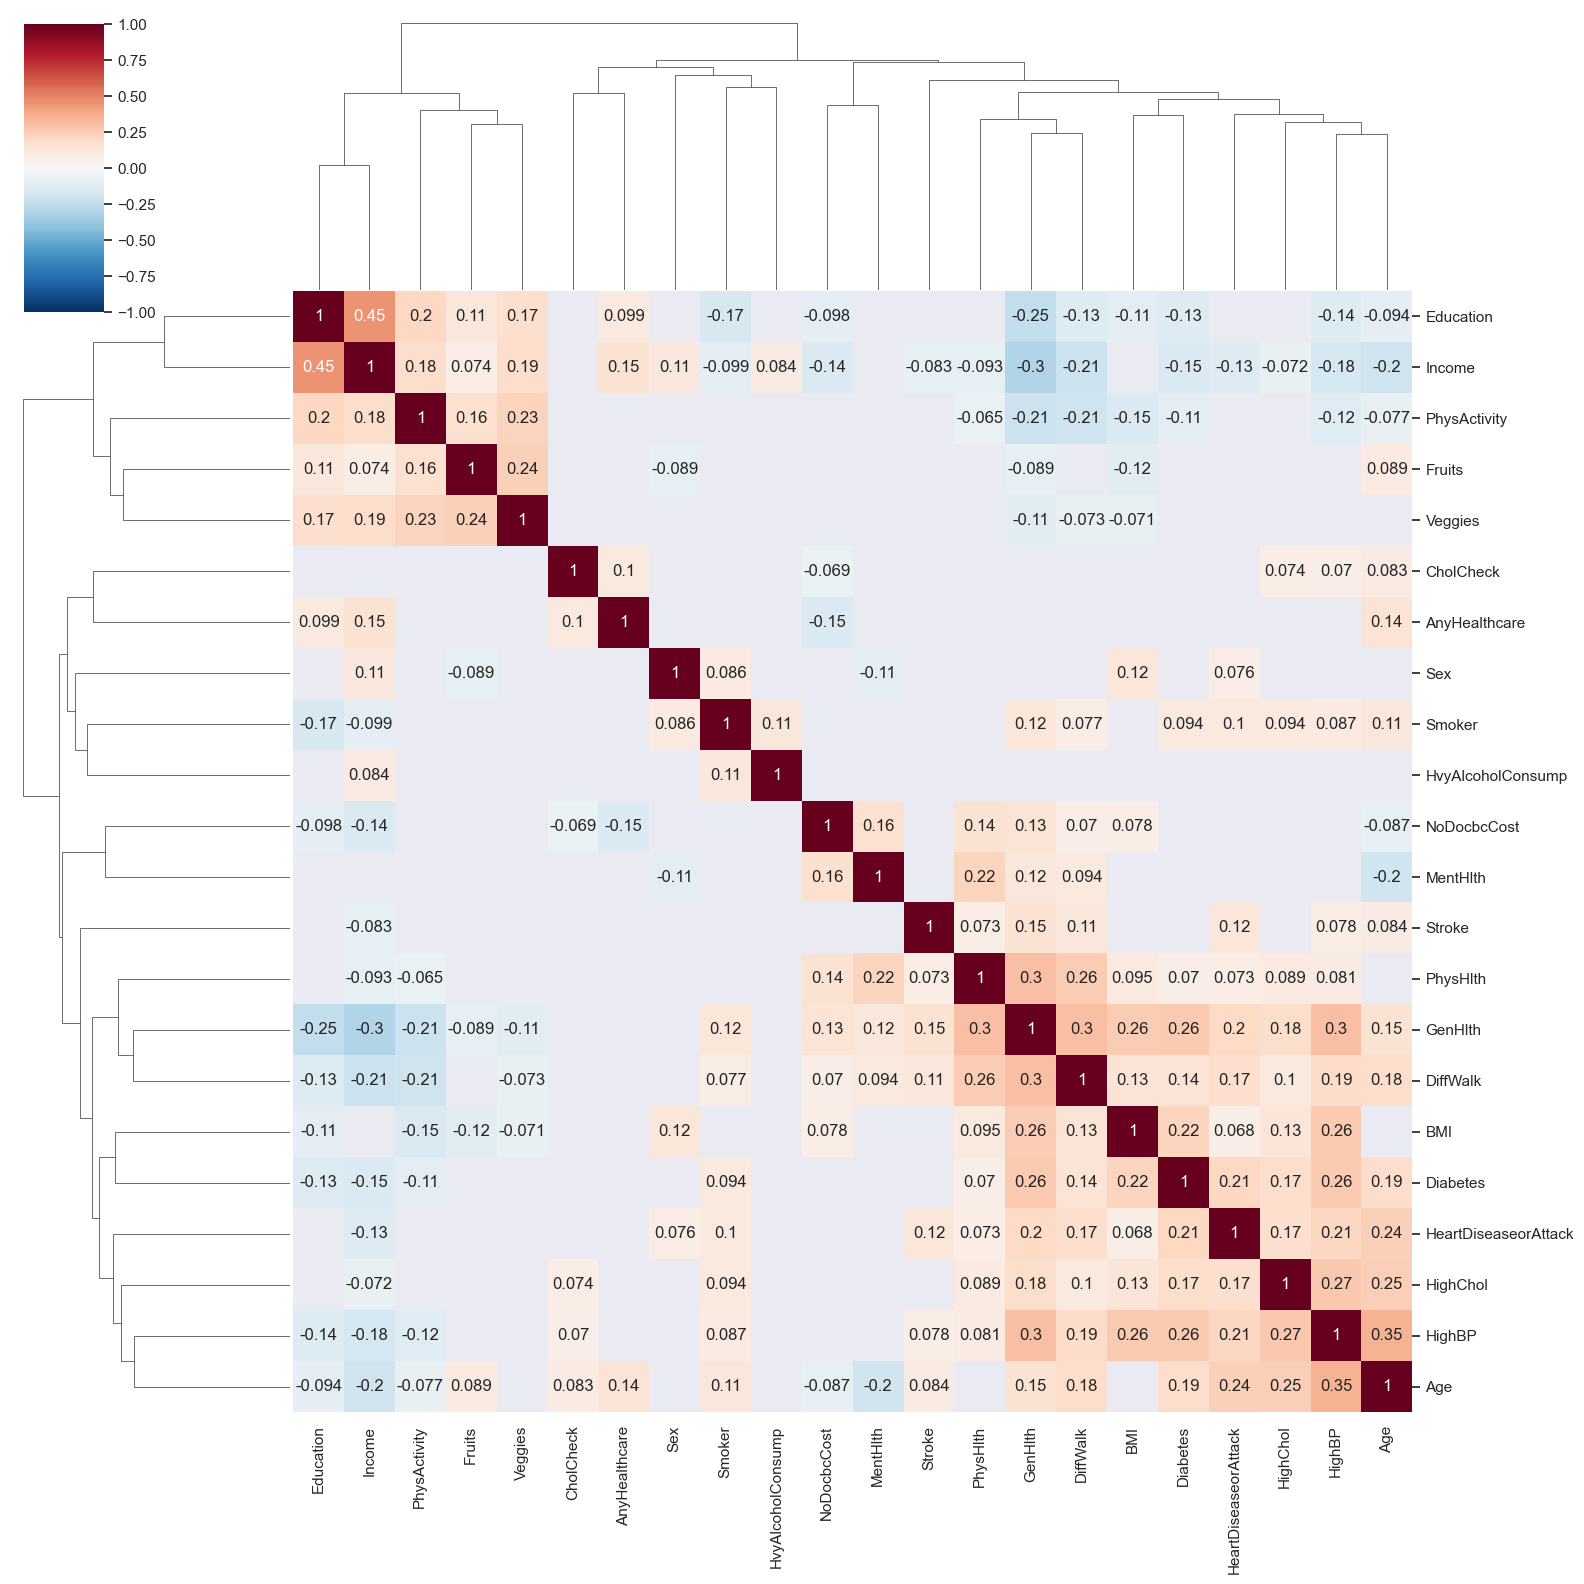

In [ ]:
# стоим матрицу корреляций Спирмена
sns.clustermap(
    data_heart.corr(method='spearman'),
    cmap='RdBu_r',
    vmin=-1,
    vmax=1,
    annot=True,
    mask=corr_sig(data_heart) >= 0.001,
    figsize=(16, 16)
); 

_Выше изображена матрица корреляций Спирмена, пары переменнных, для которых корреляция не значима не отображаются. Корреляция не занчима, если она меньше 0,001._

HeartDiseaseorAttack имеет значимую положительную корреляцию с Age, HighBP, HighChol, Diabetes, Stroke, DiffWalk, GenHlth, PhysHlth, Smoker, Sex. И отрицательную коореяцию с Education и Income. Что логично: возраст  и различные проблемы со здоровьем лишь повышают вероятность сердечных заболеваний или инфаркта, а образование и доход, наоборот, снижают, так как обеспечивают человеку занятость на каждый день, а следовательно, и активный образ жизни, что укрепляет здоровье.

### 5. Посмотрим на распределения признаков:

In [ ]:
def histplots(data: pd.DataFrame, colnames: np.array): #напишем функцию, которая построит все графики сразу
    plt.figure(figsize = (20, 40))
    for ind in range(1, len(colnames)+1):
        ax = plt.subplot(7, 3, ind)
        plt.hist(data[colnames[ind-1]], bins=50)
        plt.title(colnames[ind-1], fontsize=17)

Text(0.5, 0.9, 'Распределения признаков')

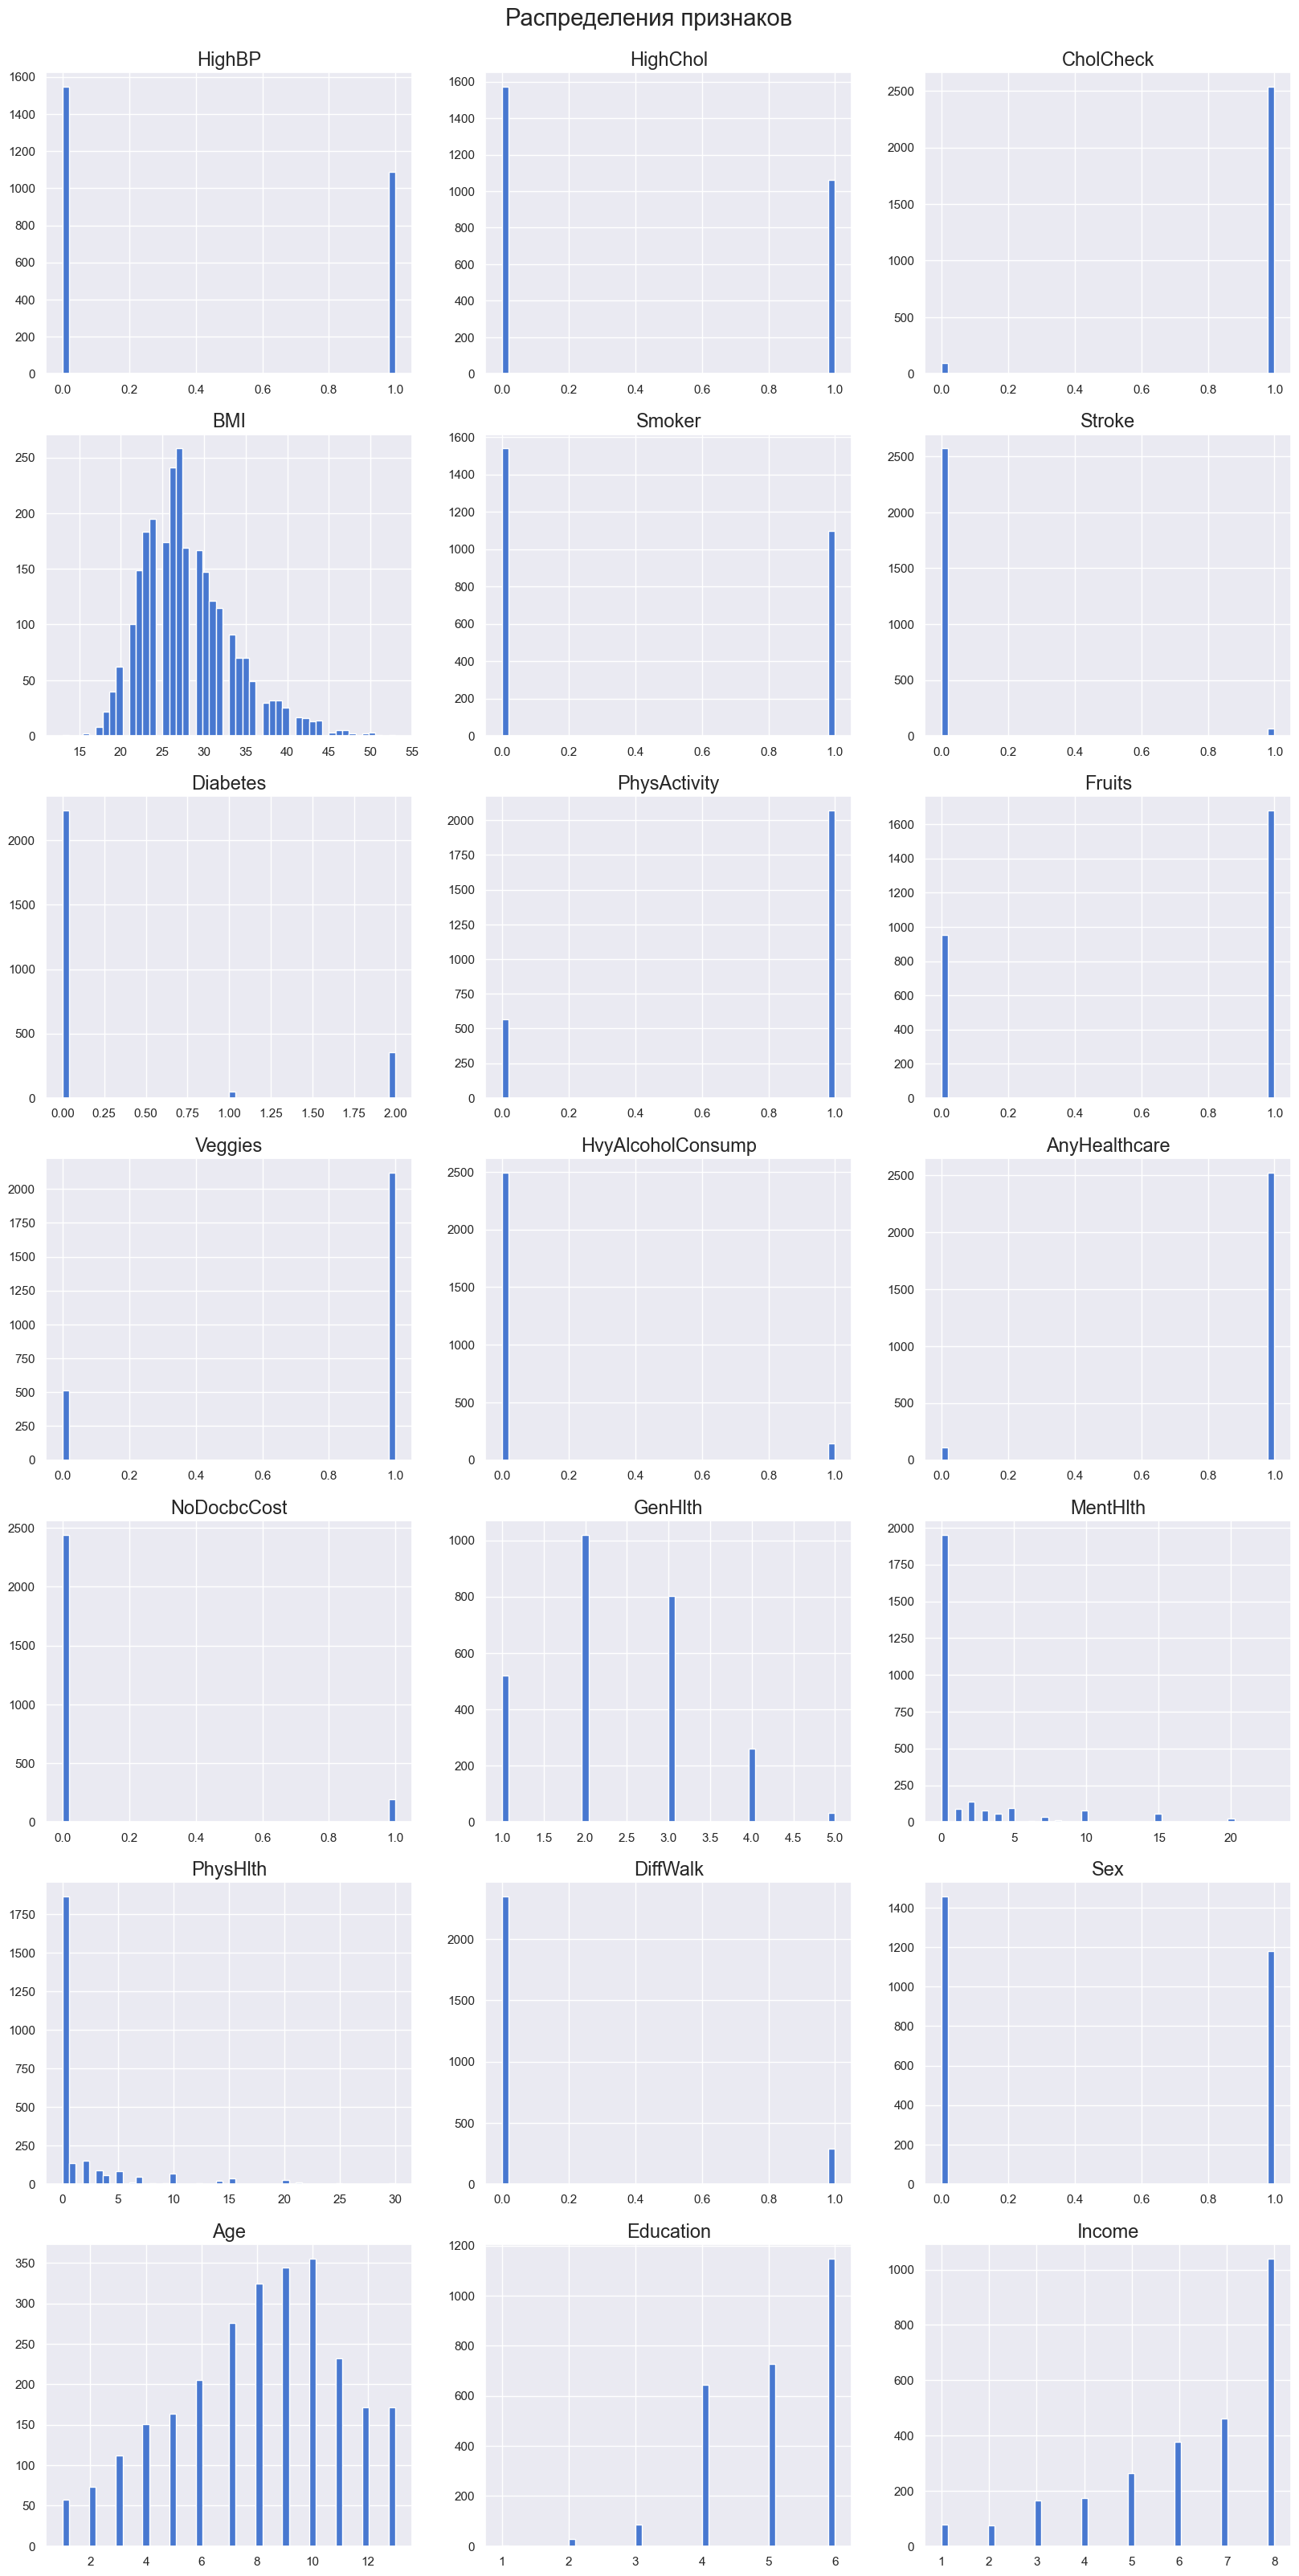

In [ ]:
histplots(data_heart, cols)
plt.suptitle('Распределения признаков', fontsize=21, y=0.9)

_По бинарным переменным сразу видны классы с большей долей. Если смотреть на порядковые и количественные переменные, то можно заметить, что распределения BMI и Age очень похожи на нормальное, и это можно будет проверить в дальнейшем._

### Датасет про инсульты (stroke)


__Описание переменных:__
- __gender:__ Пол респондента;
- __age:__ Возраст респондента;
- __hypertension:__ У респондента наблюдается гипертензия;
- __heart_disease:__ У респондента есть сердечное заболевание;
- __ever_married:__ Респондент состоит(-ял) в браке;
- __work_type:__ Тип трудоустройства;
- __Residence_type:__ Тип местности, в которой живет респондент;
- __avg_glucose_level:__ Средний уровень глюкозы в крови респондента;
- __bmi:__ Индекс массы тела;
- __smoking_status:__ Курил ли когда-либо респондент;
- __stroke:__ Был ли инсульт у респондента;

### 1. Выгружаем данные и описываем:

In [ ]:
df_stroke = pd.read_csv('full_data.csv') # скачиваем данные
df_stroke.head()#выводим первые 5 строк

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


__Типы признаков:__
* __Бинарные переменные:__ 'hypertension', 'heart_disease', 'stroke', 'gender', 
* __Непрерывные:__ 'bmi', 'avg_glucose_level', 'age'
* __Категориальные:__ 'ever_married', 'work_type', 'Residence_type', 'smoking_status'

In [ ]:
# выводим статистическую сводку (с помощью метода describe) в транспонированном виде, для удобства анализа
display(df_stroke.describe().T) 
df_stroke.info() # выводим информацию о данных в таблице

,count,mean,std,min,25%,50%,75%,max
age,4981.0,43.419859,22.662755,0.08,25.00,45.00,61.00,82.00
hypertension,4981.0,0.096165,0.294848,0.00,0.00,0.00,0.00,1.00
heart_disease,4981.0,0.055210,0.228412,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,4981.0,105.943562,45.075373,55.12,77.23,91.85,113.86,271.74
bmi,4981.0,28.498173,6.790464,14.00,23.70,28.10,32.60,48.90
stroke,4981.0,0.049789,0.217531,0.00,0.00,0.00,0.00,1.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


### 2. Отбираем часть данных и проверяем на пропуски:

In [ ]:
_, data_stroke = sample(df_stroke, test_size=3000, stratify=df_stroke['stroke'], random_state=2023) 
data_stroke.shape 

(3000, 11)

In [ ]:
# Пропусков нет
print(f'Пропусков в данных: {data_stroke.isna().sum().sum()}')

Пропусков в данных: 0


__Есть незакодированные категориальные данные, поэтому преобразуем их с помощью OneHotEncoding__

In [ ]:
data_stroke = pd.get_dummies(
    data_stroke,
    columns=df_stroke.select_dtypes('object').columns,
    drop_first=True
) # мы перобразуем категориальные переменные в dummy variables

### 3. Проверим данные на наличие выбросов:

In [ ]:
# посмотрим на полученные в итоге столбцы
columns = np.array(data_stroke.columns)
columns

array(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Male', 'ever_married_Yes', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'Residence_type_Urban', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype=object)

In [ ]:
#возьмем все признаки, кроме Stroke(в будущем целевая), a из закодированных оставим только бполученные бинарные
cols_2 = np.array(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
                   'gender_Male', 'ever_married_Yes', 'Residence_type_Urban'])

Text(0.5, 0.9, 'Выбросы по разным признакам')

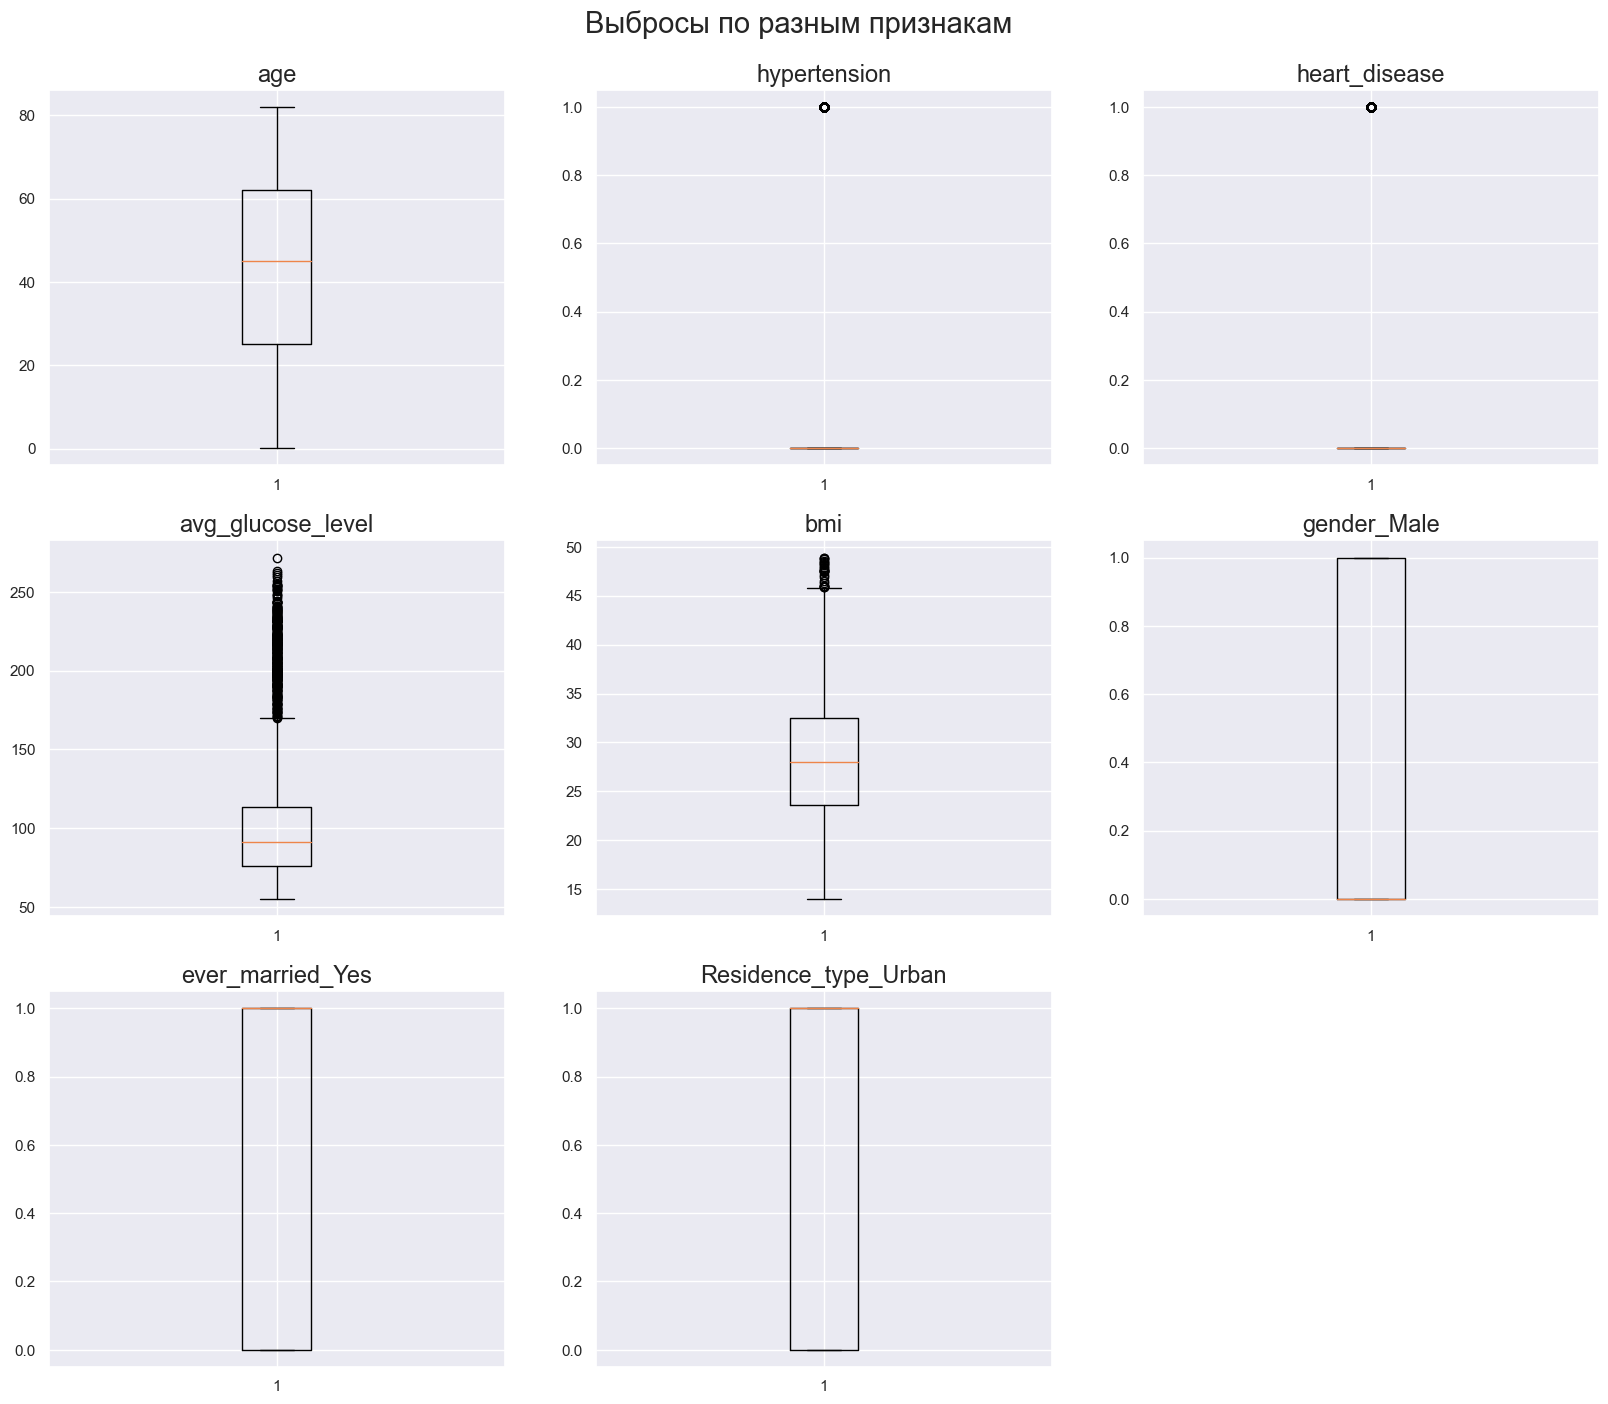

In [ ]:
boxplots(data_stroke, cols_2)
plt.suptitle('Выбросы по разным признакам', fontsize=21, y=0.9)

_По графикам видно, что есть выбросы в различных переменных и данные многомерны, мы снова решили применить многомерное шкалирование, чтобы дальше избавиться от них._

Проводим такую же процедуру, как и на первом датасете.

In [ ]:
data_stroke_mds = MDS(random_state=2023).fit_transform(data_stroke)

In [ ]:
data_stroke_mds_inliers, inliers = remove_outliers(data_stroke_mds)
data_stroke = data_stroke.loc[inliers] # получили данные без выбросов
data_stroke.shape 

(2727, 15)

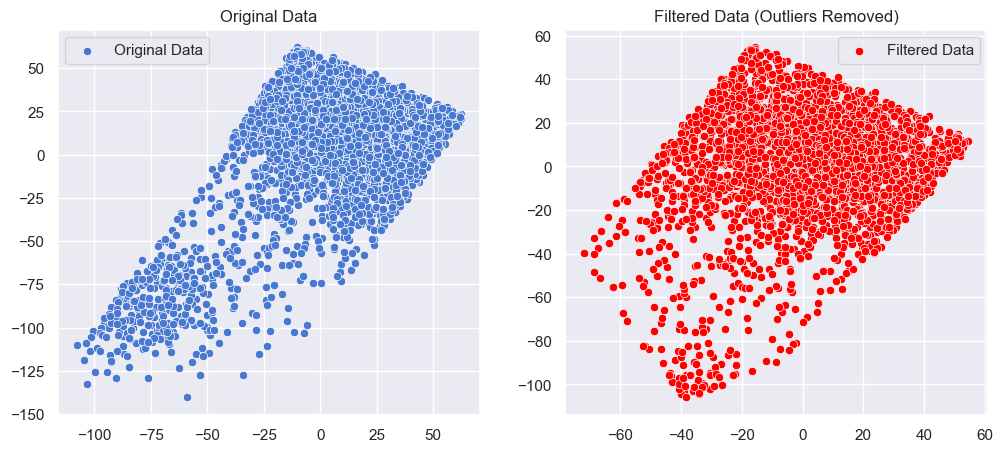

In [ ]:
# отшкалируем уже преобразованные признаки и отобразим на графиках
data_stroke_filt = MDS(random_state=2023).fit_transform(data_stroke) 
plot_data(data_stroke_mds, data_stroke_filt)

_Было изначально 3000 наблюдений, выбросы составили примерно 10% всех наблдений_

### 4. Посчитаем корреляцию и посмотрим на наличие связей между переменными:

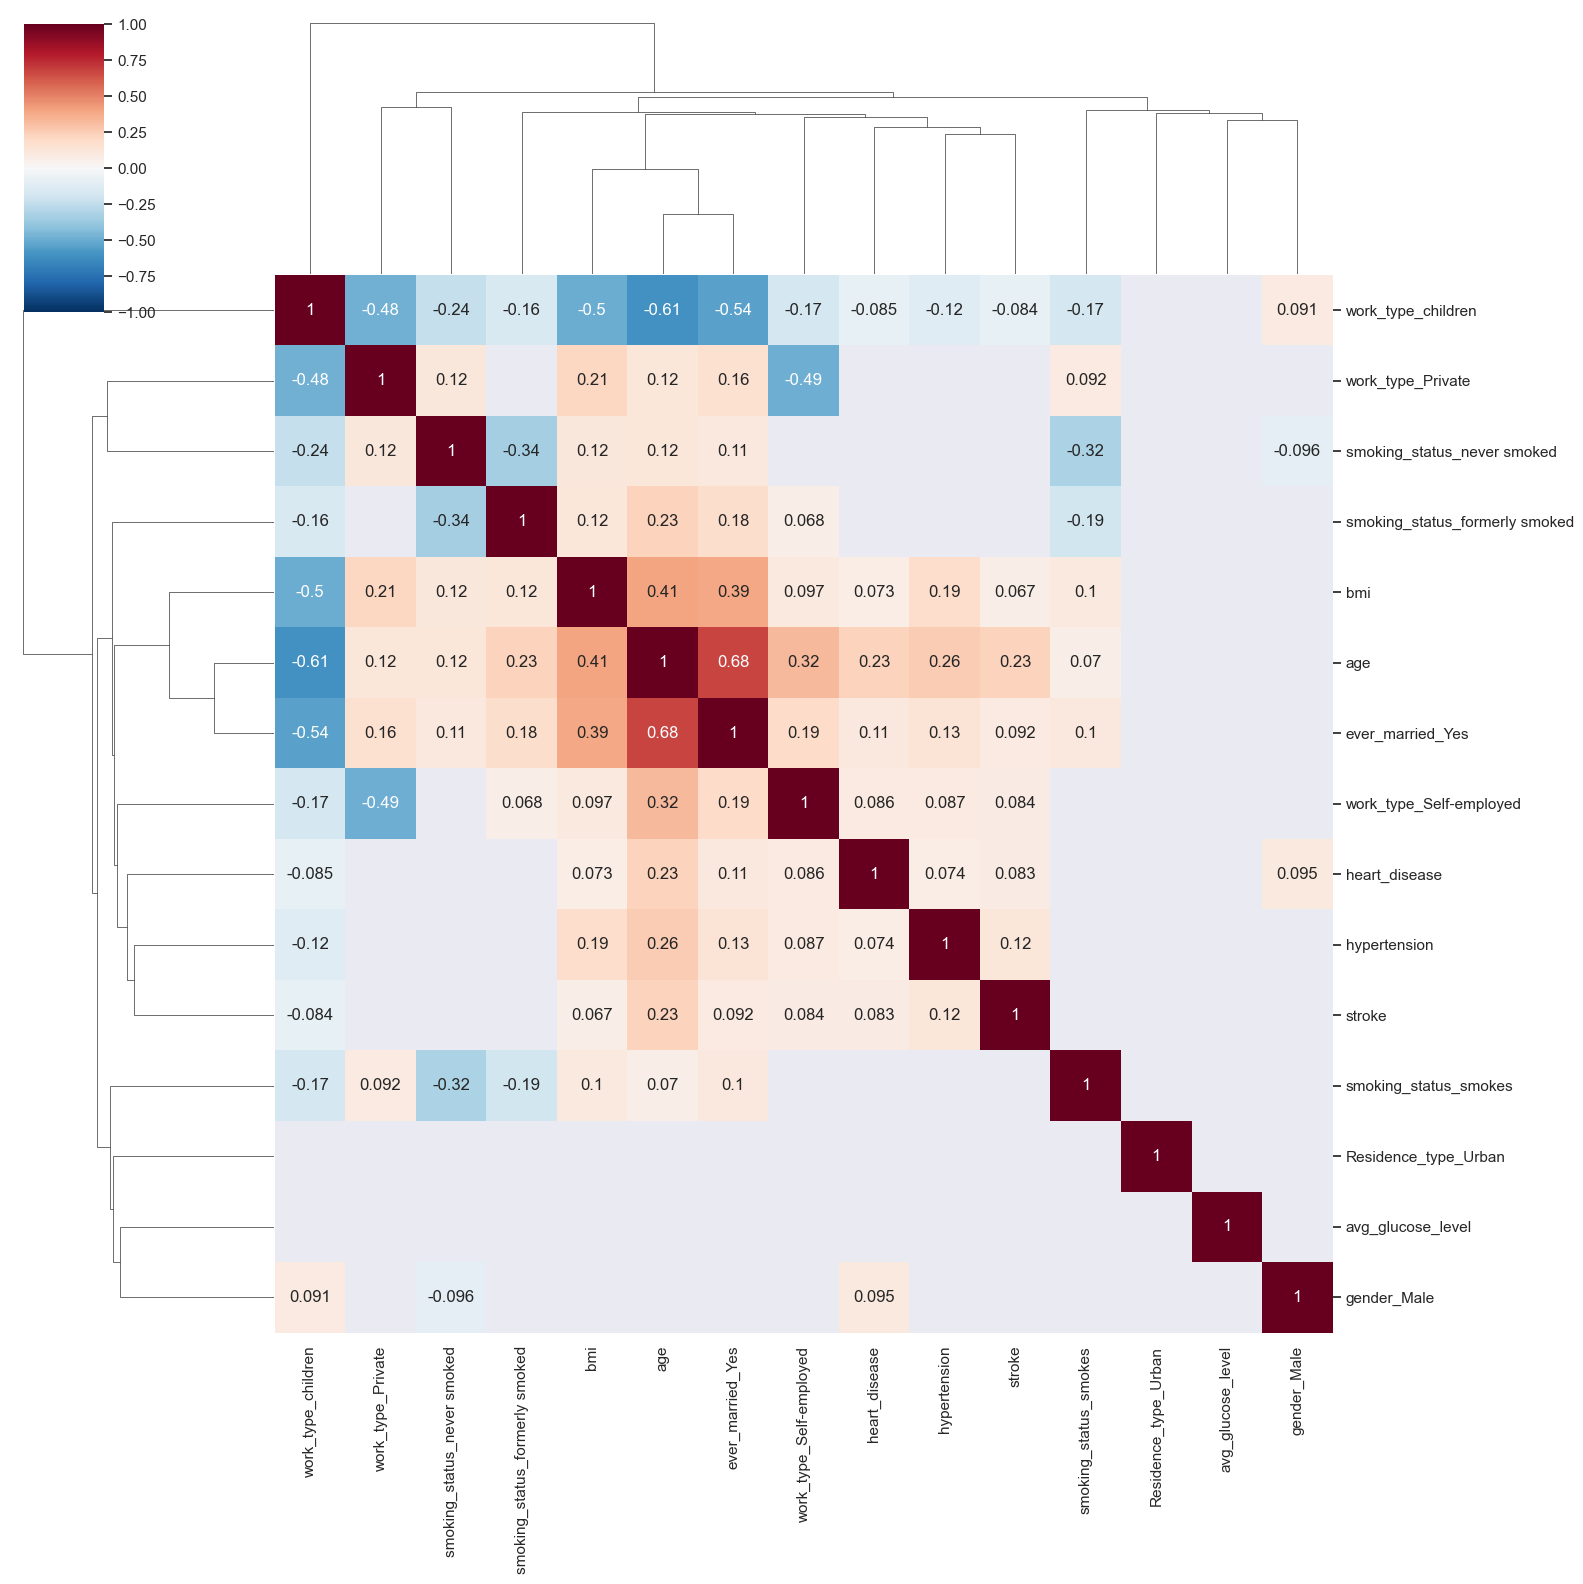

In [ ]:
sns.clustermap(
    data_stroke.corr(method='spearman'),
    cmap='RdBu_r',
    vmin=-1,
    vmax=1,
    annot=True,
    mask=corr_sig(data_stroke) >= 0.001,
    figsize=(16, 16)
); # стоим матрицу корреляций Спирмена

Инсульт имеет значимую положительную корреляцию с гипертезией, заболеваниями сердца, возрастом, самозанятостью. И отрицательную коореяцию с работой и детьми. Что в принципе логично: люди, имеющие проблемы со здоровьем более склонны к инсультам, а вот наличие работы и детей обеспечивает постоянную активность, что улучшает здоровье.

### 5. Посмотрим на распределения признаков:

Text(0.5, 0.9, 'Распределения признаков')

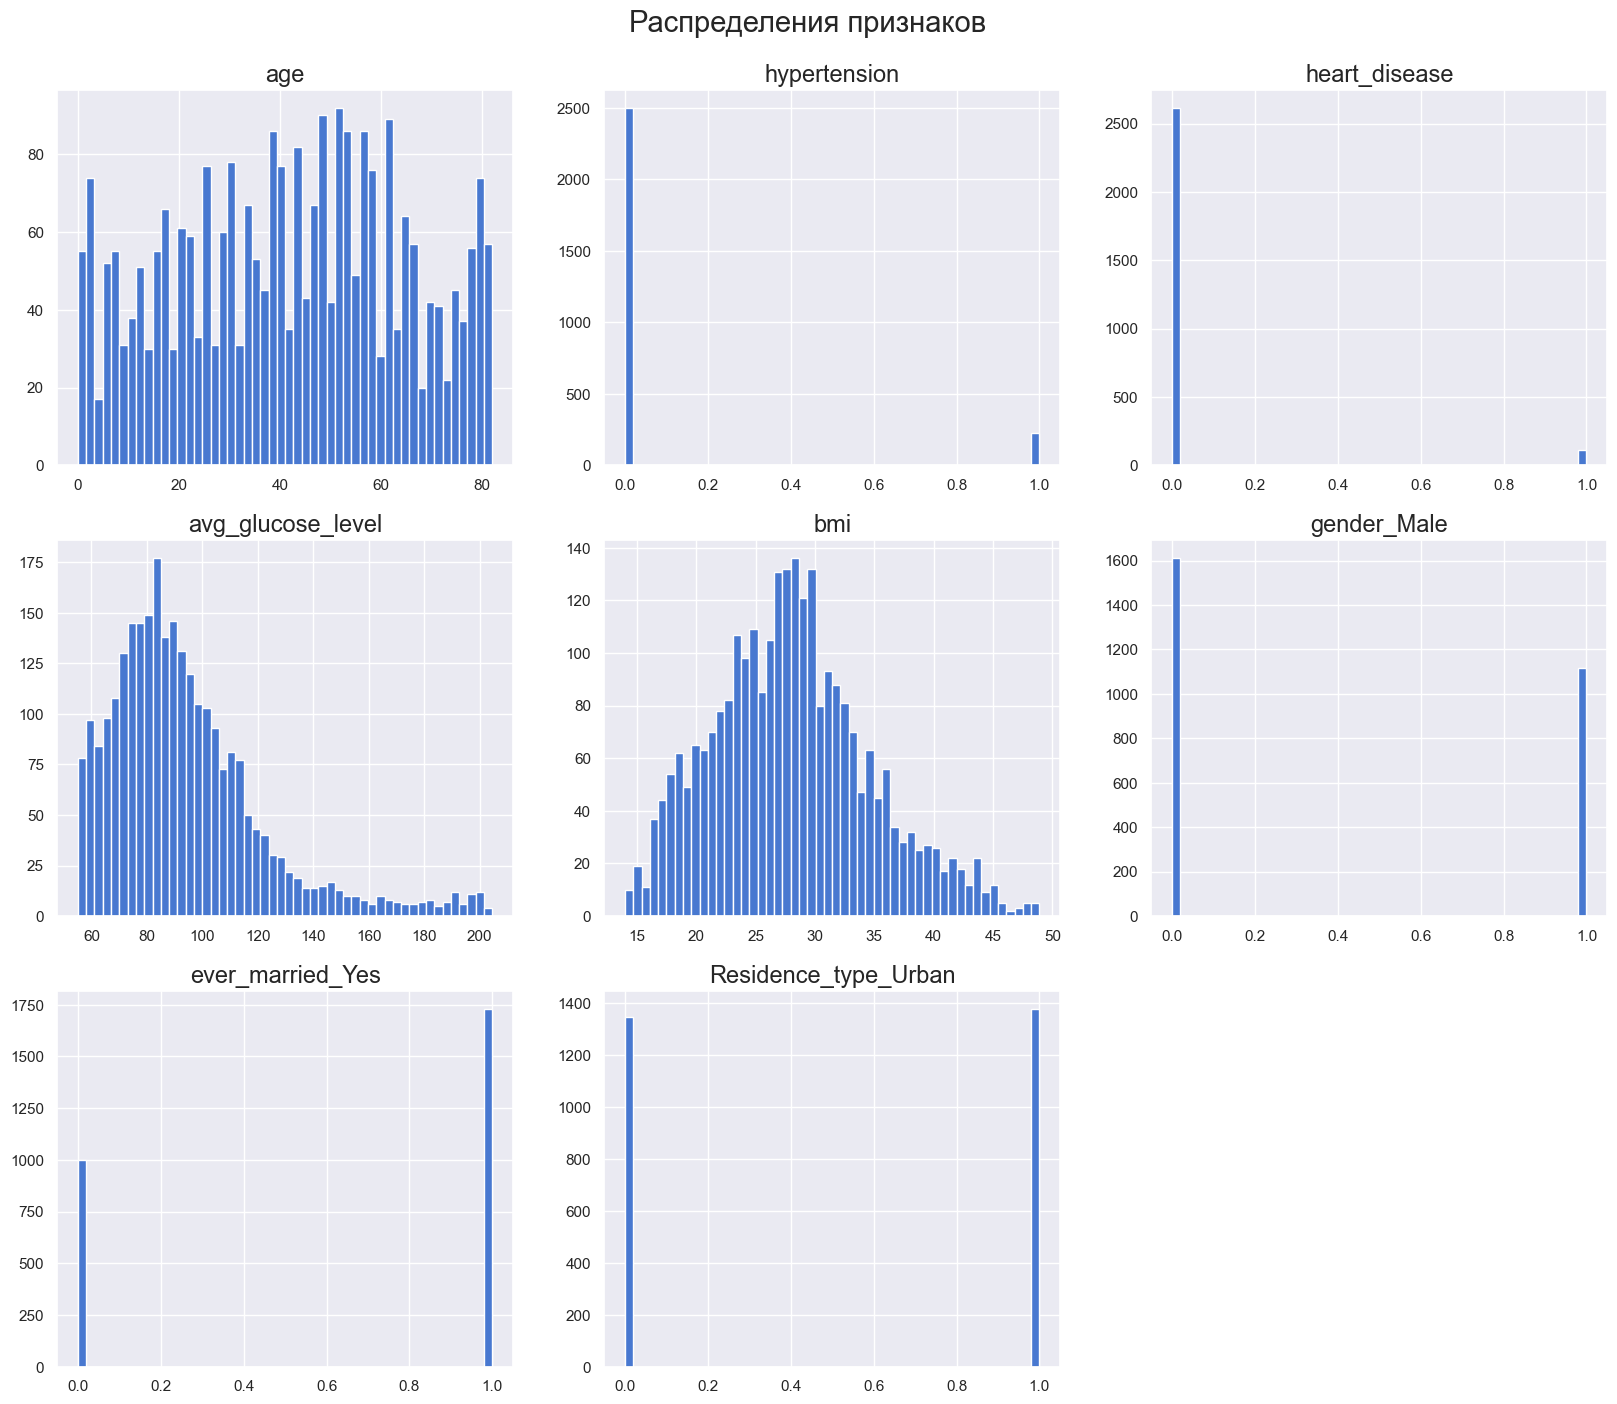

In [ ]:
histplots(data_stroke, cols_2)
plt.suptitle('Распределения признаков', fontsize=21, y=0.9)

_Опять же по бинарным переменным сразу видны классы с большей долей. Если смотреть на порядковые и количественные переменные, то можно заметить, что распределения BMI похоже на нормальное, более того, оно оченнь похоже на распределение эьой же переменной в предыдущем датасете.

__Замечание:__ поскольку переменные Age в двух наборах данные представлены по-разному, каких-то конкретных выводов мы сделать не можем, поэтому было решено не сравнить их.

__В этой части использовались следующие источники информации:__ 
- https://docs.scipy.org/doc/scipy/reference/index.html 
- https://pandas.pydata.org/pandas-docs/stable/reference/frame.html 
- https://numpy.org/doc/stable/reference/routines.array-creation.html 
- https://runebook.dev/ru/docs/scikit_learn/modules/generated/sklearn.manifold.mds 
- https://spec-zone.ru/scikit_learn/modules/generated/sklearn.manifold.mds